In [5]:
from qiskit import *
from qiskit import Aer
from qiskit.circuit.library.standard_gates import HGate
import numpy as np
import matplotlib.pyplot as plt
import itertools
import matplotlib.ticker as ticker
from qiskit.visualization import plot_state_city
from qiskit.providers.ibmq import least_busy
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
simulator = Aer.get_backend('statevector_simulator')
from qiskit import IBMQ, assemble, transpile

provider = IBMQ.load_account()
provider.backends(simulator=False, operational=True)
small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                   and not x.configuration().simulator)
small_devices

ibmqfactory.load_account:WARNING:2021-06-14 16:17:24,303: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [20]:
N = 4
qc = QuantumCircuit(4)
qr = QuantumRegister(4)

def Fgate(k):
    qcirc = QuantumCircuit(2,name="F_{:}".format(k))
    qcirc.rz(np.pi*k/N,0)
    qcirc.cx(0,1)
    qcirc.ch(1,0)
    qcirc.cx(0,1)
    qcirc.cz(0,1)
    return(qcirc.to_instruction())

def fSWAP():
    qcirc = QuantumCircuit(2,name="fSWAP")
    qcirc.cx(0,1)
    qcirc.cx(1,0)
    qcirc.cx(0,1)
    qcirc.h(1)
    qcirc.cx(0,1)
    qcirc.h(1)
    return(qcirc.to_instruction())

qc.x(1)

qc.x(3)

orderedlist = [["f",0,1,1],["f",2,3,0],["s",1,2],["f",0,1,0],["f",2,3,0],["s",1,2]]
for i in orderedlist:
    if(i[0] == "s" and len(i) == 3):
        qc.append(fSWAP(),[i[1],i[2]])
    elif(i[0] == "f" and len(i) == 4):
        qc.append(Fgate(i[3]),[i[1],i[2]])
    else:
        print("Failed circuit instruction: {:}".format(i))

qc.draw()

┌──────┐          ┌──────┐          
q_0: ─────┤0     ├──────────┤0     ├──────────
     ┌───┐│  F_1 │┌────────┐│  F_0 │┌────────┐
q_1: ┤ X ├┤1     ├┤0       ├┤1     ├┤0       ├
     └───┘├──────┤│  fSWAP │├──────┤│  fSWAP │
q_2: ─────┤0     ├┤1       ├┤0     ├┤1       ├
     ┌───┐│  F_0 │└────────┘│  F_0 │└────────┘
q_3: ┤ X ├┤1     ├──────────┤1     ├──────────
     └───┘└──────┘          └──────┘

## Run on a Simulator

In [21]:
job = execute(qc, simulator)

[-0. +0.j  0. -0.j  0. -0.j -0. +0.j -0. -0.j -0.5+0.j -0.5+0.j  0. -0.j
 -0. +0.j -0.5+0.j -0.5+0.j  0. +0.j -0. +0.j  0. -0.j  0. -0.j -0. +0.j]


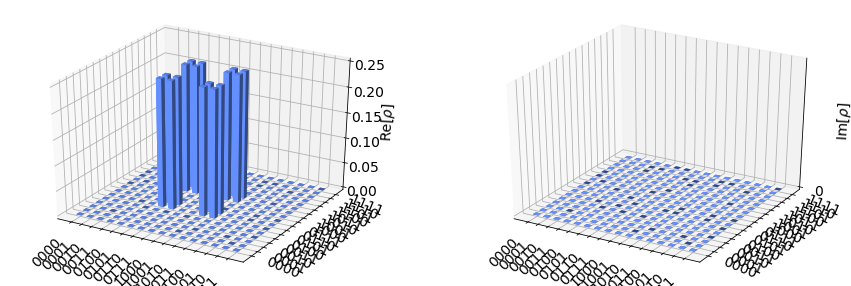

In [22]:
result=job.result()
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
plot_state_city(outputstate)

## Run on an actual device